In [2]:
import pandas as pd
import numpy as np
import scipy, scipy.stats
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'font.size': 22})

## How to Choose Prior

- First of all, Bayesian approach does not take 0 or 1 prior. Which meaning that if we know that some is sure to happen or not to happen, the posterior will be the same as prior. 
- #### In real world, we usually want to calibrate the $\theta$ distribution, so that most of our observed data falls in the 95% interval.
    The prior predictive distribution is $f(y)=\int f(y,\theta)d\theta$.      ---------------- what does this mean ????

## Prior and posterior predictive distributions
Prior predictive distribution is the distribution of the data we thought we could obtain before we see the data. For instance, if we flip a coin 10 times, and observe how many times head comes up. if we think the coin is fair, we probably going to assume a binominal distribution centered around 5. It is our predictive distribution of X not $\theta$. 

- #### Prior -- Before see data: integrating all possible $\theta$s to get the marginal probibility -- it is a likelihood function $$X=\sum_{i=1}^{N}x_i$$ $$f(X) = \int {f(X,\theta)d\theta}=\int {f(X|\theta)f(\theta)d\theta}$$ 
- it is essentially taking the likelihood times prior and integrate all possible $\theta$
- here, $x_i$ can be a vector or a matrix, it stands for the particular data we observed. X stands for all possible data out there that we can observe. So $f(X)$ will be a distribution rather than a data point. 

In [8]:
## for instance: like the example we looked at notebook 2, we have patient data: 
# Make array of data, as in Table 3.1 (transposed here).
n = np.array([ 
[8,     9,     9,     5,     4,     1,     1,     0,     0,     0],
[3,     5,     8,     9,    14,    10,     3,     3,     0,     0],
[0,     1,     1,    10,    16,    11,    12,     7,     8,     5],
[0,     0,     1,     0,     3,     5,    10,     7,     7,     4]
])
data = pd.DataFrame(n,columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'],index=['x1','x2','x3','x4'])
data['Row_Sum'] = data.sum(axis=1)
data.loc['Column_Sum'] = data.sum(axis=0)
data.loc['Column_Sum','Row_Sum']=np.sum(n)
data

            D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  Row_Sum
x1           8   9   9   5   4   1   1   0   0    0       37
x2           3   5   8   9  14  10   3   3   0    0       55
x3           0   1   1  10  16  11  12   7   8    5       71
x4           0   0   1   0   3   5  10   7   7    4       37
Column_Sum  11  15  19  24  37  27  26  17  15    9      200 

Then, f(X) would be: 



Then, $f(X)$ would be the distribution of [x1,x2,x3,x4]: 

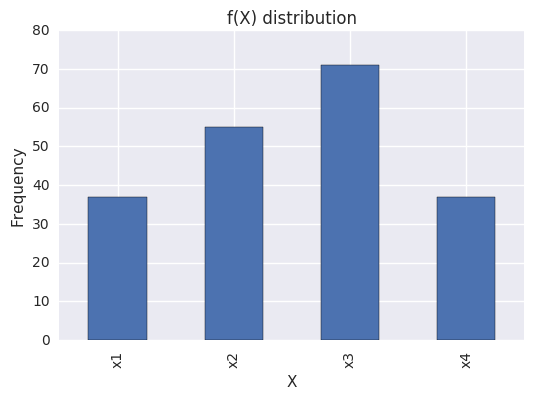

In [20]:
fx = data.Row_Sum[:4]
fx.plot(kind='bar',title="f(X) distribution")
plt.xlabel("X")
plt.ylabel("Frequency")

This is a discrete case, but the same idea applies to continuous distribution. The observed data can have a particular distribution. And we will see how likely that we could observe that distribution from all possible distribution that is out there. 

- #### In practice, we often use a distribution family to work with. 


- #### Posterior -- After seen data X. Now what is the predicted distribution of all possible $\hat{X}$:
$$f(\hat{X}|x)=\int f(\hat{X},\theta|X)d\theta = \int{f(\hat{X}|\theta)f(\theta|X)d\theta}$$
it is essentially the likelihood times posterior $\theta$ 
